In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
# Проверка формата столбцов
print(df.dtypes)


Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [6]:
# Преобразуем столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

# Проверим изменения после преобразования
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
# Группировка данных по дате и подсчет общего количества продаж
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [10]:
# Вывод первых строк сгруппированных данных
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

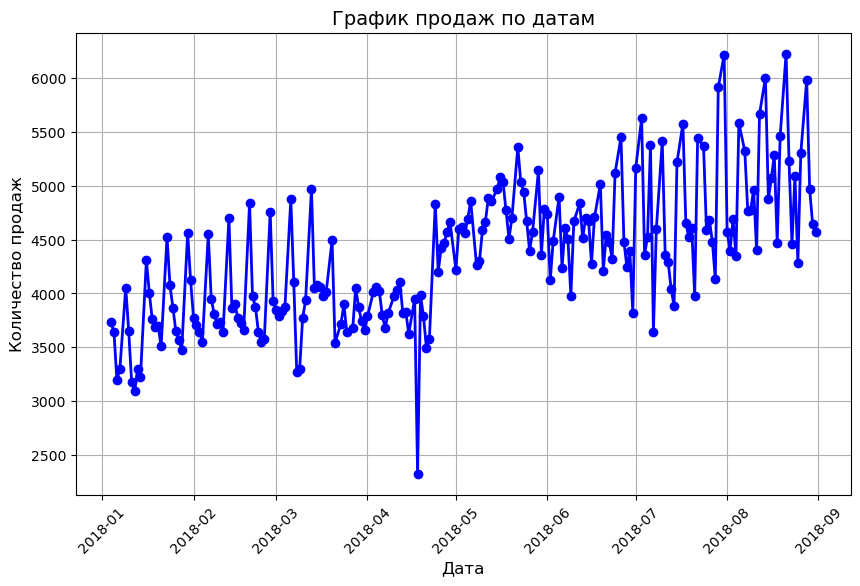

In [12]:
# Построение графика продаж
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Добавляем подписи и заголовок
plt.title('График продаж по датам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)

# Поворот меток на оси X для улучшения читаемости
plt.xticks(rotation=45)

# Отображаем сетку
plt.grid(True)

# Отображаем график
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике видно, что количество продаж колеблется с течением времени. Наблюдается постепенный рост количества продаж в течение периода. Продажи в начале года (январь-март) находятся на более низком уровне, но к августу они достигают максимальных значений. В апреле 2018 года заметен резкий спад продаж (около 2500), что требует дополнительного анализа. В августе 2018 года продажи достигают максимальных значений (превышают 6000), что говорит о периоде повышенного спроса или увеличении активности на рынке. Возможно, на графике есть признаки сезонности, поскольку уровень продаж начал расти с мая и достиг пиков в августе.

В целом, продажи имеют восходящий тренд от начала года до конца лета.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [16]:
# Находим строки с выбросами по количеству продаж
Q1 = np.percentile(df['Количество'], 25)  # 25-й процентиль (Q1)
Q3 = np.percentile(df['Количество'], 75)  # 75-й процентиль (Q3)
IQR = Q3 - Q1  # Межквартильный размах (IQR)

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем строки с выбросами
outliers = df[df['Количество'] > upper_bound]

# Находим строку с максимальным выбросом
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

# Выводим строку с максимальным выбросом
print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [18]:
# Топовый товар по продажам по средам в июне, июле и августе для 3-го склада
filtered_df = df[df['Склад'] == 3]

# Фильтруем данные по месяцам (июнь, июль, август)
filtered_df = filtered_df[filtered_df['Дата'].dt.month.isin([6, 7, 8])]

# Добавляем столбец с днем недели
filtered_df['ДеньНедели'] = filtered_df['Дата'].dt.day_name()

# Фильтруем данные по средам
filtered_df = filtered_df[filtered_df['ДеньНедели'] == 'Wednesday']

# Группируем по товару и считаем сумму продаж
grouped_by_product = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

# Находим товар с максимальными продажами
top_product = grouped_by_product.loc[grouped_by_product['Количество'].idxmax()]

print("Топовый товар по продажам:")
print(top_product)

Топовый товар по продажам:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [20]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Загрузка данных о погоде
weather_file_path = '35188.01.01.2018.01.09.2018.1.0.0.ru.utf8.00000000.xls'

# Чтение данных о погоде с пропуском первых строк (заголовков)
weather_data = pd.read_excel(weather_file_path, skiprows=6)

In [28]:
# Преобразуем столбец "Местное время в Астане" в datetime
weather_data['Местное время в Астане'] = pd.to_datetime(weather_data['Местное время в Астане'], format='%d.%m.%Y %H:%M')

In [44]:
weather_data['Местное время в Астане'].head()

0   2018-09-01 23:00:00
1   2018-09-01 20:00:00
2   2018-09-01 17:00:00
3   2018-09-01 14:00:00
4   2018-09-01 11:00:00
Name: Местное время в Астане, dtype: datetime64[ns]

In [32]:
# Добавляем столбец с датой (без времени)
weather_data['Дата'] = weather_data['Местное время в Астане'].dt.date


In [42]:
weather_data['Дата'].head()

0    2018-09-01
1    2018-09-01
2    2018-09-01
3    2018-09-01
4    2018-09-01
Name: Дата, dtype: object

In [36]:
# Рассчитываем среднюю температуру по дням
daily_weather = weather_data.groupby('Дата')['T'].mean().reset_index()

In [40]:
daily_weather.head()

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


In [50]:
# Преобразуем столбец 'Дата' в формате datetime в обоих DataFrame
daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])

In [52]:
# Объединяем данные по дате
merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='left')

In [54]:
merged_df.head()

,Дата,Количество,T
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500


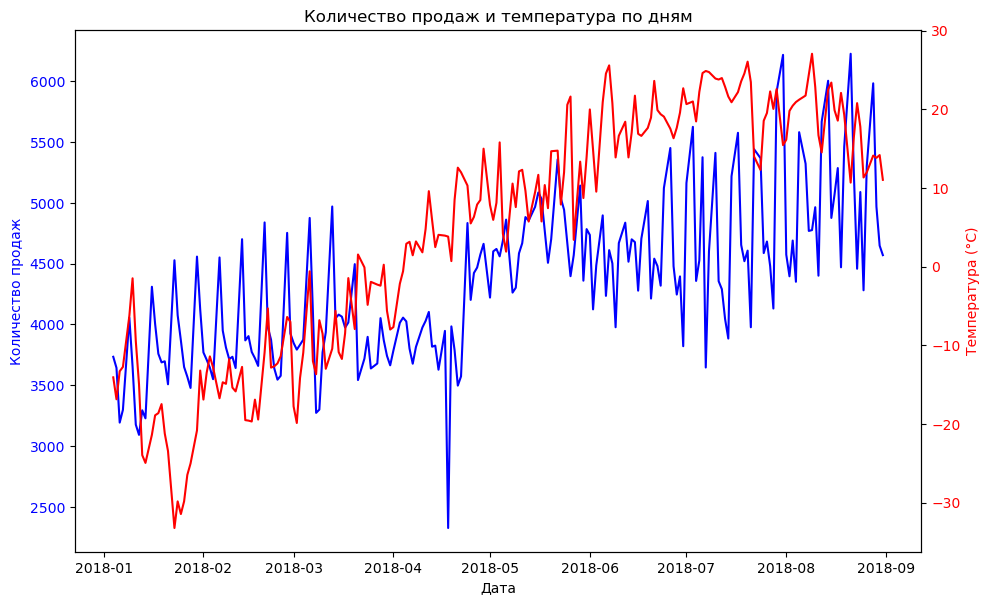

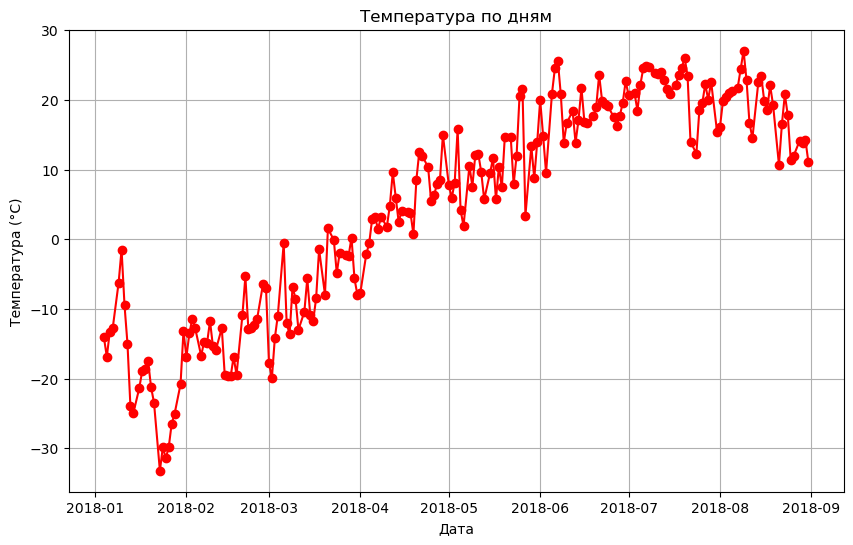

In [56]:
# Строим графики
fig, ax1 = plt.subplots(figsize=(10, 6))

# График для Количества продаж и температуры
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='blue', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], color='red', label='Температура')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Количество продаж и температура по дням')
plt.show()

# Отдельный график температуры
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['T'], color='red', marker='o')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура по дням')
plt.grid(True)
plt.show()